# An example for using the two-phase 1cycle policy in fastai v0.7

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

I have created a symbolic link for fastai v0.7 in `fastai_v0_7`. You can do it in your own way as long as you can import. 

In [2]:
from fastai_v0_7.imports import *
from fastai_v0_7.transforms import *
from fastai_v0_7.conv_learner import *
from fastai_v0_7.model import *
from fastai_v0_7.dataset import *
from fastai_v0_7.sgdr import *
from fastai_v0_7.plots import *

In [3]:
PATH = 'data/mnist_tiny/'
sz = 28

In [ ]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

## The 1cycle policy (three-phase) in fastai v0.7

In [4]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 11/11 [00:09<00:00,  1.20it/s]


In [11]:
learn.fit(0.01, 1, cycle_len=3, use_clr_beta=[25, 30, 0.95,0.85])

 50%|█████     | 6/12 [00:00<00:00,  6.31it/s, loss=0.0717]

/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch      trn_loss   val_loss   accuracy                   
    0      0.08873    0.060187   0.982833  
    1      0.060196   0.045285   0.987124                   
    2      0.053458   0.043697   0.987124                  



[array([0.0437]), 0.9871244635193133]

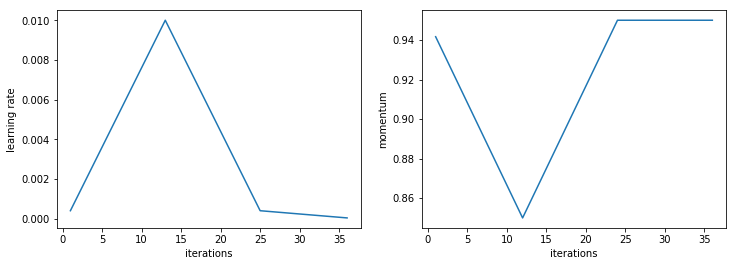

In [13]:
learn.sched.plot_lr()

## The two-phase 1cycle policy for fastai v0.7

In [12]:
learn1 = ConvLearner.pretrained(arch, data, precompute=True)

In [14]:
from one_cycle import OneCycleLR

In [ ]:
lr_max = 0.01
cycle_len = 3

We'll need the `LayerOptimizer` to construct our scheduler:

In [ ]:
layer_opt = learn1.get_layer_opt(lr_max, None)

Create our one cycle scheduler and add it to the learner:

In [27]:
ocs = OneCycleLR(layer_opt, len(learn1.data.trn_dl) * cycle_len)

In [28]:
learn1.sched = ocs

We can't use `fit` directly, because it will reset the `sched`. Instead, we call `fit_gen`:

In [33]:
learn1.fit_gen(learn1.model, learn1.data, layer_opt, cycle_len)

epoch      trn_loss   val_loss   accuracy                  
    0      0.098968   0.055688   0.984263  
    1      0.085365   0.06037    0.985694                   
    2      0.07039    0.051064   0.988555                  



[array([0.05106]), 0.9885550786838341]

What learning rates did we use in the training? Let's plot it:

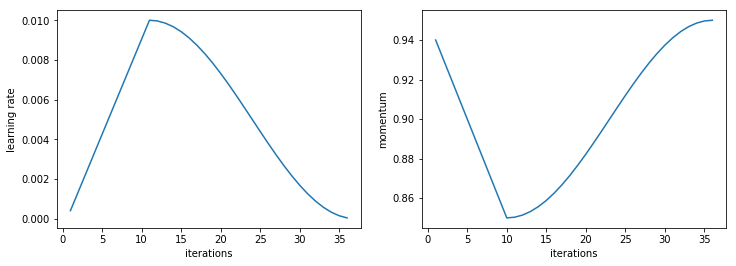

In [34]:
learn1.sched.plot_lr()

This is exactly what we want!